In [94]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
sns.set()

# Read data

In [95]:
train = pd.read_csv('input/train.csv', index_col='PassengerId')
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
train.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family size,Deck
PassengerId,,,,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,unknown,S,Rev,1,unknown
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss,1,B
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,unknown,S,Miss,4,unknown
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr,1,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,unknown,Q,Mr,1,unknown


In [96]:
test = pd.read_csv('input/test.csv', index_col='PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [97]:
test.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [98]:
both = pd.concat([train.drop('Survived', axis=1), test])
both.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
both.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [144]:
both.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 16 columns):
Pclass                1309 non-null int64
Name                  1309 non-null object
Sex                   1309 non-null object
Age                   1046 non-null float64
SibSp                 1309 non-null int64
Parch                 1309 non-null int64
Ticket                1309 non-null object
Fare                  1308 non-null float64
Cabin                 295 non-null object
Embarked              1307 non-null object
Title                 1309 non-null object
Mapped Title          1309 non-null object
Family size           1309 non-null int64
Mapped SibSp          1309 non-null object
Mapped Parch          1309 non-null object
Mapped Family size    1309 non-null object
dtypes: float64(2), int64(4), object(10)
memory usage: 173.9+ KB


# Adding 'Title' category 

In [100]:
def get_title(full_name):
    return full_name.split(',')[1].split('.')[0].strip()

In [101]:
train['Title'] = train['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title)
both['Title'] = both['Name'].apply(get_title)

In [102]:
print('Training title info:')
pd.DataFrame({'Title Instances' :train['Title'].value_counts(), 
              '% survived': round(train.groupby(by='Title')['Survived'].mean()*100)}).sort_values(by='Title Instances', ascending=False)

Training title info:


,Title Instances,% survived
Mr,517,16.0
Miss,182,70.0
Mrs,125,79.0
Master,40,57.0
Dr,7,43.0
Rev,6,0.0
Major,2,50.0
Col,2,50.0
Mlle,2,100.0
Sir,1,100.0


In [103]:
print(f"Test Title info:\n {test['Title'].value_counts()}")

Test Title info:
 Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64


In [104]:
pd.DataFrame({'Title Instances' :both['Title'].value_counts(), 
              'Medium age': both.groupby('Title')['Age'].median()}).sort_values(by='Title Instances', ascending=False)


,Title Instances,Medium age
Mr,757,29.0
Miss,260,22.0
Mrs,197,35.5
Master,61,4.0
Rev,8,41.5
Dr,8,49.0
Col,4,54.5
Ms,2,28.0
Major,2,48.5
Mlle,2,24.0


#### Titles conclusions:
- Main categories: Mr, Miss, Mrs, Master
- Might be able to consider as a category: Rev, Dr (each appearing 6-7 times in the training sample).  Rev - all not survived, Dr - 50% survived, above average Mr.  Although they don't behave so much like a Mr. - still think we can't learn too much from such small numbers, putting together with Mr.
- The rest appear so rarely, doesn't make sense to make conclusions based on their survival rate inside the title.  Doesn't make sense to leave as a separate category, since don't have much in common.  Splitting into categories based on gender, age and marital status.

In [582]:
both['Mapped Title'] = both['Title'].replace({'Lady': 'Mrs', 
                                              'Mme': 'Mrs',
                                              'Dona': 'Mrs',
                                              'the Countess': 'Mrs',
                                              'Ms': 'Miss', 
                                              'Mlle': 'Miss',
                                              'Sir': 'Mr',
                                              'Major': 'Mr',
                                              'Capt': 'Mr',
                                              'Jonkheer': 'Mr',
                                              'Don': 'Mr',
                                              'Col': 'Mr',
                                              'Rev': 'Mr',
                                              'Dr': 'Mr'})
train['Mapped Title'] = train['Title'].replace({'Lady': 'Mrs', 
                                              'Mme': 'Mrs',
                                              'Dona': 'Mrs',
                                              'the Countess': 'Mrs',
                                              'Ms': 'Miss', 
                                              'Mlle': 'Miss',
                                              'Sir': 'Mr',
                                              'Major': 'Mr',
                                              'Capt': 'Mr',
                                              'Jonkheer': 'Mr',
                                              'Don': 'Mr',
                                              'Col': 'Mr',
                                              'Rev': 'Mr',
                                              'Dr': 'Mr'}) 
both['Mapped Title'].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Mapped Title, dtype: int64

## Handling Parch (Parents, children), SibSp (Siblings, Spouces), Family size

#### Handling Parch (Parents, children)

In [109]:
print('Number of Parents/children + survival rate in training set:')
pd.DataFrame({'Parch Instances' :train['Parch'].value_counts(), 
              '% survived': round(train.groupby(by='Parch')['Survived'].mean()*100)})

Number of Parents/children survival rate in training set:


,Parch Instances,% survived
0,678,34.0
1,118,55.0
2,80,50.0
3,5,60.0
4,4,0.0
5,5,20.0
6,1,0.0


In [117]:
print(f"Number of Parents/children in testing set:\n{test['Parch'].value_counts().sort_index()}")

Number of Parents/children in testing set:
0    324
1     52
2     33
3      3
4      2
5      1
6      1
9      2
Name: Parch, dtype: int64


In [115]:
print(f"Number of Parents/children survival rate in both sets:\n{both['Parch'].value_counts().sort_index()}")

Number of Parents/children survival rate in both sets:
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: Parch, dtype: int64


Just looking at Parch (number of parents/children) and the survival rate, seems that the best way to group is:
- 0 separately
- 1 & 2 - either together or separately (55 vs 50% survival)
- 3 has 60% survival, but too few observations (5 in training set), so probably better to put it together with 1 & 2
- 4 and up - survival rates low, but too few observations to make definite conclusions, can put together    

In [140]:
both['Mapped Parch'] = both['Parch'].replace({0: '0', 
                                              1: '1_2_3', 2: '1_2_3', 3: '1_2_3', 
                                              4: '4+', 5: '4+', 6: '4+', 9: '4+'})
both['Mapped Parch'].value_counts()

0        1002
1_2_3     291
4+         16
Name: Mapped Parch, dtype: int64

#### Handling SibSp (Siblings, Spouces)

In [116]:
print('Number of Siblings/spouces + survival rate in training set:')
pd.DataFrame({'SibSp Instances' :train['SibSp'].value_counts(), 
              '% survived': round(train.groupby(by='SibSp')['Survived'].mean()*100)})

Number of Siblings/spouces + survival rate in training set:


,SibSp Instances,% survived
0,608,35.0
1,209,54.0
2,28,46.0
3,16,25.0
4,18,17.0
5,5,0.0
8,7,0.0


In [118]:
print(f"Number of Siblings/spouces in testing set:\n{test['SibSp'].value_counts().sort_index()}")

Number of Siblings/spouces in testing set:
0    283
1    110
2     14
3      4
4      4
5      1
8      2
Name: SibSp, dtype: int64


In [119]:
print(f"Number of Siblings/spouces survival rate in both sets:\n{both['SibSp'].value_counts().sort_index()}")

Number of Siblings/spouces survival rate in both sets:
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: SibSp, dtype: int64


Just looking at SibSp (number of siblings/spouces) and the survival rates, seems the best way to group is:
- 5 & 8 don't have enough observations, but all the others have enough observations, and quite different survival rate
- So group 5 & 8 together, all the others can leave separately.  
- Decide if to give 5 & 8 the same number, and leave this feature numerical, or split into categories

In [137]:
both['Mapped SibSp'] = both['SibSp'].replace({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 
                                              5: '5+', 
                                              8: '5+'})
both['Mapped SibSp'].value_counts().sort_index()

0     891
1     319
2      42
3      20
4      22
5+     15
Name: Mapped SibSp, dtype: int64

#### Adding new category Family size (1 + SibSp + Parch)

In [121]:
train['Family size'] = 1 + train['Parch'] + train['SibSp']
test['Family size'] = 1 + test['Parch'] + test['SibSp']
both['Family size'] = 1 + both['Parch'] + both['SibSp']

In [122]:
print('Number of Family members + survival rate in training set:')
pd.DataFrame({'Family members Instances' :train['Family size'].value_counts(), 
              '% survived': round(train.groupby(by='Family size')['Survived'].mean()*100)})

Number of Family members + survival rate in training set:


,Family members Instances,% survived
1,537,30.0
2,161,55.0
3,102,58.0
4,29,72.0
5,15,20.0
6,22,14.0
7,12,33.0
8,6,0.0
11,7,0.0


In [123]:
print(f"Number of Family members in testing set:\n{test['Family size'].value_counts().sort_index()}")

Number of Family members in testing set:
1     253
2      74
3      57
4      14
5       7
6       3
7       4
8       2
11      4
Name: Family size, dtype: int64


In [124]:
print(f"Number of Family members in both sets:\n{both['Family size'].value_counts().sort_index()}")

Number of Family members in both sets:
1     790
2     235
3     159
4      43
5      22
6      25
7      16
8       8
11     11
Name: Family size, dtype: int64


Just looking at Family Size and the survival rates, seems the best way to group is:
- 1
- 2 & 3
- 4
- 5, 6, 7
- 8 and more 

It's clear that there will be high correlation between these 3 categories (there are 2 more categories below that will also have high correlation, number with same last name, and number with same ticket number).  Can let the models to actually choose what's the most important categories

In [142]:
both['Mapped Family size'] = both['Family size'].replace({1: '1', 
                                                          2: '2_3', 3: '2_3', 
                                                          4: '4', 
                                                          5: '5_6_7', 6: '5_6_7', 7: '5_6_7',
                                                          8: '8+', 11: '8+'})
both['Mapped Family size'].value_counts().sort_index()

1        790
2_3      394
4         43
5_6_7     63
8+        19
Name: Mapped Family size, dtype: int64

## New Deck feature

In [162]:
def set_deck(df):
    df['Cabin'] = df['Cabin'].fillna('unknown')
    df['Deck'] = df['Cabin'].apply(lambda cab: cab[0] if (cab != 'unknown') else cab)
set_deck(train)
set_deck(test)
set_deck(both)
print(f'Set Deck for train, test and both')

Set Deck for train, test and both


In [163]:
print('Number of people per Deck + survival rate in training set:')
pd.DataFrame({'Number people on Deck': train['Deck'].value_counts(), 
              '% survived': round(train.groupby(by='Deck')['Survived'].mean()*100)})

Number of people per Deck + survival rate in training set:


,Number people on Deck,% survived
A,15,47.0
B,47,74.0
C,59,59.0
D,33,76.0
E,32,75.0
F,13,62.0
G,4,50.0
T,1,0.0
unknown,687,30.0


In [166]:
print(f"Number of people on deck in testing set:\n{test['Deck'].value_counts().sort_index()}")

Number of people on deck in testing set:
A            7
B           18
C           35
D           13
E            9
F            8
G            1
unknown    327
Name: Deck, dtype: int64


In [167]:
print(f"Number of people on deck in both sets:\n{both['Deck'].value_counts().sort_index()}")

Number of people on deck in both sets:
A            22
B            65
C            94
D            46
E            41
F            21
G             5
T             1
unknown    1014
Name: Deck, dtype: int64


Based on survival rate and number of people in every group, it makes sense to group it in the following way:
- T to put with unknown - not enough people in the group
- B, D, E - put together - around 75%
- C, F - put together - around 60%
- A, G - around 50%

In [168]:
both['Mapped Deck'] = both['Deck'].replace({'unknown': 'unknown_T', 'T': 'unknown_T',
                                            'B': 'BDE', 'D': 'BDE', 'E': 'BDE', 
                                            'C': 'CF', 'F': 'CF',
                                            'A': 'AG', 'G': 'AG'})
both['Mapped Deck'].value_counts().sort_index()

AG             27
BDE           152
CF            115
unknown_T    1015
Name: Mapped Deck, dtype: int64

## Obvious - add a category for Pclass

In [169]:
print('Number of people per Pclass + survival rate in training set:')
pd.DataFrame({'Number people per Pclass': train['Pclass'].value_counts(), 
              '% survived': round(train.groupby(by='Pclass')['Survived'].mean()*100)})

Number of people per Pclass + survival rate in training set:


,Number people per Pclass,% survived
1,216,63.0
2,184,47.0
3,491,24.0


In [170]:
print(f"Number of people per class in testing set:\n{test['Pclass'].value_counts().sort_index()}")

Number of people per class in testing set:
1    107
2     93
3    218
Name: Pclass, dtype: int64


In [172]:
print(f"Number of people per class in both sets:\n{both['Pclass'].value_counts().sort_index()}")

Number of people per class in both sets:
1    323
2    277
3    709
Name: Pclass, dtype: int64


**Conclusion**: there are enough people all classes, and survival rates differ per class

## Obvious - add a category for Sex

In [173]:
print('Number of people per Sex + survival rate in training set:')
pd.DataFrame({'Number people per Sex': train['Sex'].value_counts(), 
              '% survived': round(train.groupby(by='Sex')['Survived'].mean()*100)})

Number of people per Sex + survival rate in training set:


,Number people per Sex,% survived
female,314,74.0
male,577,19.0


In [174]:
print(f"Number of people per Sex in testing set:\n{test['Sex'].value_counts().sort_index()}")

Number of people per Sex in testing set:
female    152
male      266
Name: Sex, dtype: int64


In [175]:
print(f"Number of people per Sex in both sets:\n{both['Sex'].value_counts().sort_index()}")

Number of people per Sex in both sets:
female    466
male      843
Name: Sex, dtype: int64


## Obvious - add a category for Embarked

In [177]:
print('Number of people per Embarked + survival rate in training set:')
pd.DataFrame({'Number people per Embarked': train['Embarked'].value_counts(), 
              '% survived': round(train.groupby(by='Embarked')['Survived'].mean()*100)})

Number of people per Embarked + survival rate in training set:


,Number people per Embarked,% survived
C,168,55.0
Q,77,39.0
S,644,34.0


In [178]:
print(f"Number of people per Embarked in testing set:\n{test['Embarked'].value_counts().sort_index()}")

Number of people per Embarked in testing set:
C    102
Q     46
S    270
Name: Embarked, dtype: int64


In [179]:
print(f"Number of people per Embarked in both sets:\n{both['Embarked'].value_counts().sort_index()}")

Number of people per Embarked in both sets:
C    270
Q    123
S    914
Name: Embarked, dtype: int64


**Conclusion**: there seems to be enough observations in all 3 embarked ports, and survival rates differ, especially for 'C'

## Fare, Ticket Frequency, Fare per person

Saw in some notebooks that there fare is actually per ticket, and not per person, so we need to delete the number of fare into number of people in ticket.  Let's check that

In [182]:
(both.groupby('Ticket')['Fare'].max() - both.groupby('Ticket')['Fare'].min()).value_counts()

0.0000    927
0.6291      1
Name: Fare, dtype: int64

Indeed it seems that Max and Min of grouping by Ticket gives the same fare, so we need to split into number of people in the party

First add another useful feature: **Ticked Frequency** - how many times this ticket appeared, kind of size of family but of ticket (parties traveling together on same ticket, but not necessarily with same last name)

In [187]:
both['Ticket_Frequency'] = both.groupby('Ticket')['Ticket'].transform('count')
both['Ticket_Frequency'].value_counts()

1     713
2     264
3     147
4      64
7      35
5      35
6      24
8      16
11     11
Name: Ticket_Frequency, dtype: int64

In [189]:
train_temp = both.iloc[:892]
train_temp['Survived'] = train['Survived']
print('Number of people per Ticket_Frequency + survival rate in training set:')
pd.DataFrame({'Number people per Ticket_Frequency': train_temp['Ticket_Frequency'].value_counts(), 
              '% survived': round(train_temp.groupby(by='Ticket_Frequency')['Survived'].mean()*100)})

Number of people per Ticket_Frequency + survival rate in training set:


C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Number people per Ticket_Frequency,% survived
1,482,27.0
2,181,51.0
3,101,65.0
4,44,73.0
5,21,33.0
6,19,21.0
7,24,21.0
8,13,38.0
11,7,0.0


In [190]:
print(f"Number of people per Ticket_Frequency in testing set:\n{both.iloc[892:]['Ticket_Frequency'].value_counts().sort_index()}")

Number of people per Ticket_Frequency in testing set:
1     231
2      83
3      46
4      20
5      14
6       5
7      11
8       3
11      4
Name: Ticket_Frequency, dtype: int64


In [191]:
print(f"Number of people per Ticket_Frequency in both sets:\n{both['Ticket_Frequency'].value_counts().sort_index()}")

Number of people per Ticket_Frequency in both sets:
1     713
2     264
3     147
4      64
5      35
6      24
7      35
8      16
11     11
Name: Ticket_Frequency, dtype: int64


**Ticket_Frequency** is useful for 2 reasons:
1. As a feature in itself.  Then it's better to map it into similar categories (see below)
2. For calculations of other features, like fare.  For now we'll continue with this goal and then go back to #1

In [193]:
both['Fixed Fare'] = both['Fare'] / both['Ticket_Frequency']
both['Fixed Fare'].describe()

count    1308.000000
mean       14.757627
std        13.555638
min         0.000000
25%         7.550000
50%         8.050000
75%        15.008325
max       128.082300
Name: Fixed Fare, dtype: float64

In [197]:
both['Fixed Fare'].value_counts(dropna=False).sort_index().tail()

66.825000     2
68.389600     2
82.506933     3
128.082300    4
NaN           1
Name: Fixed Fare, dtype: int64

First we need to fix the missing value, since it's only 1 won't invest too much into it, let's find him

In [198]:
both[both['Fixed Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mapped Title,Family size,Mapped SibSp,Mapped Parch,Mapped Family size,Deck,Mapped Deck,Ticket_Frequency,Fixed Fare
PassengerId,,,,,,,,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,unknown,S,Mr,Mr,1,0,0,1,unknown,unknown_T,1,NaN


We see that it's a person from 3rd class. Let's see distribution of tickets in 3rd class:

In [200]:
both[both['Pclass']==3]['Fixed Fare'].describe()

count    708.000000
mean       7.329146
std        1.471362
min        0.000000
25%        7.060031
50%        7.750000
75%        7.925000
max       19.966700
Name: Fixed Fare, dtype: float64

In [207]:
both[both['Pclass']==3]['Fixed Fare'].value_counts().sort_index().head()

0.0000    4
3.1708    1
3.7111    3
4.0125    1
4.2150    5
Name: Fixed Fare, dtype: int64

We see that prices of tickets are very close to each other around 7 in 3rd class, so we can give him average rate

In [202]:
print(f"To decide if taking median / mean / mode, median: {both[both['Pclass']==3]['Fixed Fare'].median()}, mean: {both[both['Pclass']==3]['Fixed Fare'].mean()}, mode: {both[both['Pclass']==3]['Fixed Fare'].mode()}")

To decide if taking median / mean / mode, median: 7.75, mean: 7.329145550847469, mode: 0    8.05
dtype: float64


There are some free tickets which we need to consider separately.  Besides that it doesn't make much of a difference what to give - median, mode, or mean, all around 7.3 up to 8.05. Giving median

In [227]:
both['Fixed Fare'] = both['Fixed Fare'].fillna(both[both['Pclass']==3]['Fixed Fare'].median())
both['Fare'] = both['Fare'].fillna(both[both['Pclass']==3]['Fixed Fare'].median())

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


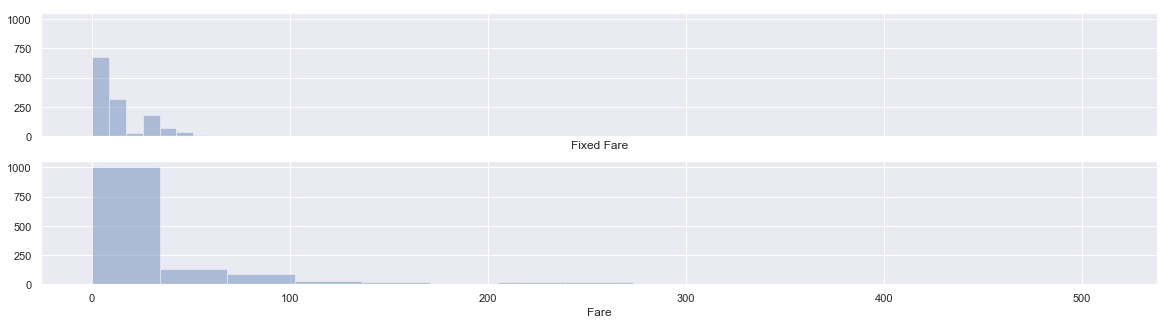

In [245]:
figure, axes = plt.subplots(2, 1, figsize = (20,5), sharey=True, sharex=True)
sns.distplot(both['Fixed Fare'], ax=axes[0], bins=15, kde=False)
sns.distplot(both['Fare'], ax=axes[1], bins=15, kde=False)
figure.show()

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


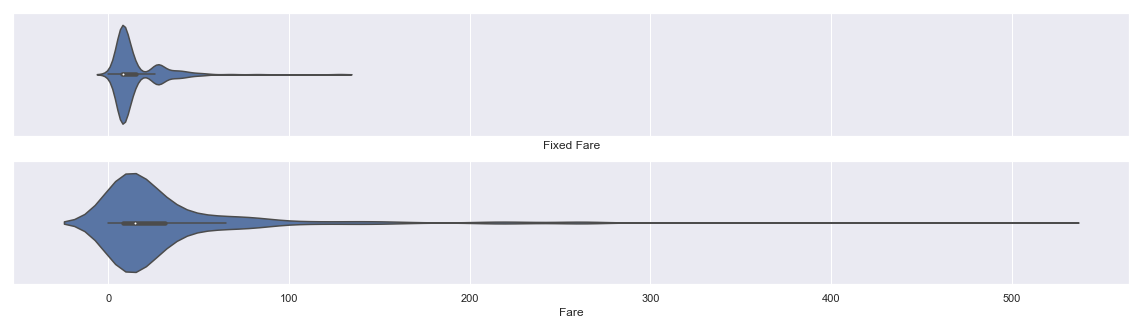

In [249]:
figure, axes = plt.subplots(2, 1, sharey=True, sharex=True, figsize = (20,5)) 
sns.violinplot(both['Fixed Fare'], ax=axes[0])
sns.violinplot(both['Fare'], ax=axes[1])
figure.show()

We see that Fixed fare indeed made the fare spread less severe, average of Fixed fair is slightly lower, there is a spike around 30-40, and maximum is under 150, while max faire is around 550 

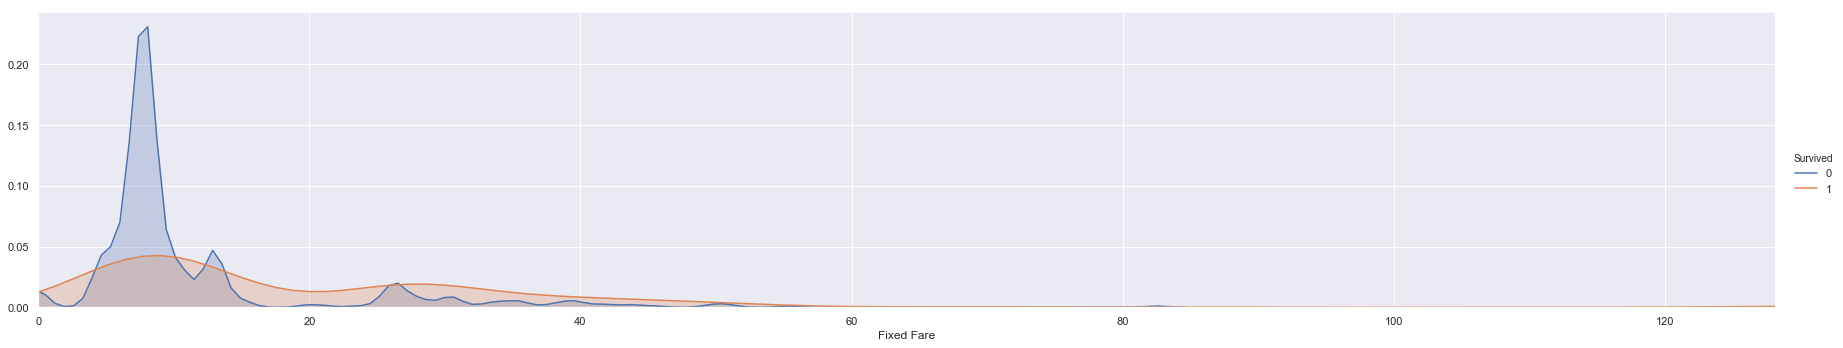

In [320]:
facet = sns.FacetGrid(train_temp, hue="Survived",aspect=5, height=5)
facet.map(sns.kdeplot,'Fixed Fare',shade= True)
facet.set(xlim=(0, train_temp['Fixed Fare'].max()))
facet.add_legend()

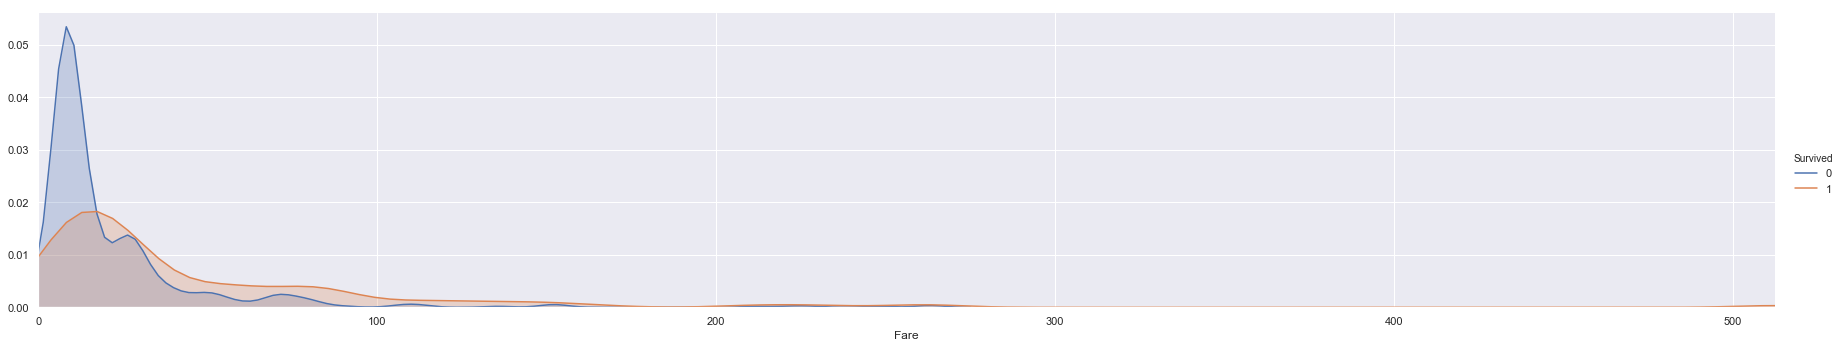

In [321]:
facet = sns.FacetGrid(train_temp, hue="Survived",aspect=5, height=5)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train_temp['Fare'].max()))
facet.add_legend()

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Split into maximum bins of Number of people per Fare + survival rate in training set:


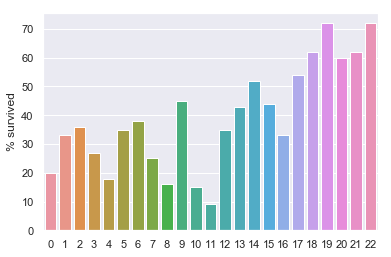

    Number people per Fair  % survived             labels
0                       71        20.0      (-0.001, 4.8]
1                       61        33.0       (4.8, 5.862]
2                       61        36.0     (5.862, 6.868]
3                       53        27.0     (6.868, 7.225]
4                       49        18.0      (7.225, 7.25]
5                       49        35.0      (7.25, 7.722]
6                       45        38.0      (7.722, 7.75]
7                       45        25.0      (7.75, 7.796]
8                       45        16.0     (7.796, 7.896]
9                       45        45.0     (7.896, 7.925]
10                      40        15.0      (7.925, 8.05]
11                      40         9.0      (8.05, 8.662]
12                      39        35.0       (8.662, 9.5]
13                      36        43.0        (9.5, 10.5]
14                      35        52.0      (10.5, 12.35]
15                      33        44.0      (12.35, 13.0]
16            

In [442]:
from sklearn.preprocessing import LabelEncoder
labels = pd.qcut(both['Fixed Fare'], q=23)
both['Fare Bin'] = LabelEncoder().fit_transform(labels)
train_temp = both.iloc[:891]
train_temp['Survived'] = train['Survived']

print('Split into maximum bins of Number of people per Fare + survival rate in training set:')
fare_survived = pd.DataFrame({'Number people per Fair': train_temp['Fare Bin'].value_counts().reset_index(drop=True), 
              '% survived': round(train_temp.groupby(by='Fare Bin')['Survived'].mean()*100)})

sns.barplot(x=fare_survived.index, y=fare_survived['% survived'])
plt.show()
fare_survived['labels'] = labels.value_counts().sort_index().index

print(fare_survived)

Not clear so much what's the best way to split Fare per person. 

Based on this, we need to understand a bit better what happens for Fixed Fares (per person) that are smaller than 15. Above 15, survival rate fluctuates around 60%

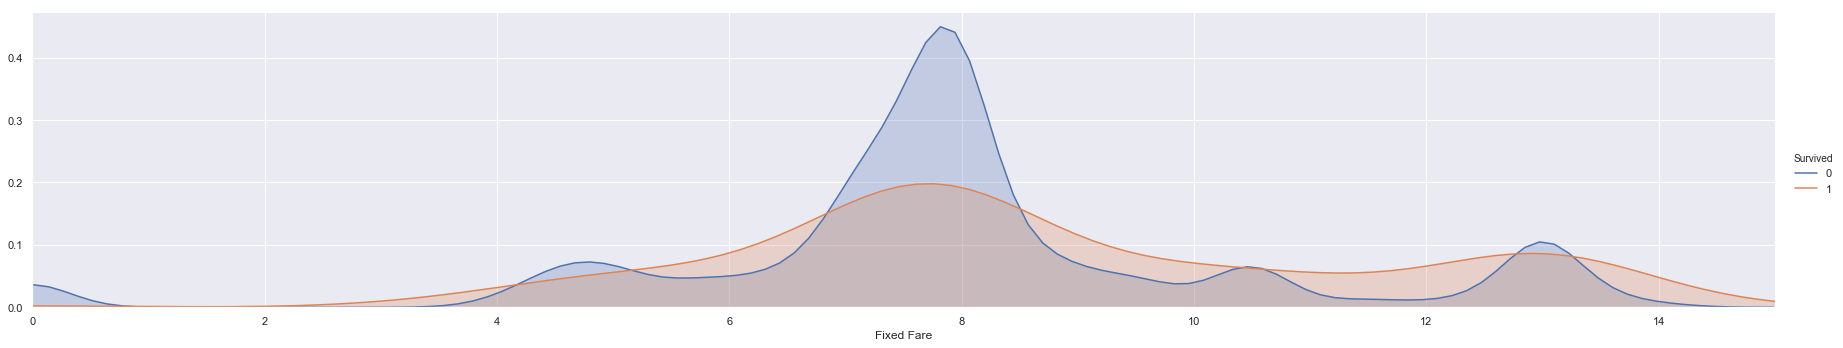

In [430]:
facet = sns.FacetGrid(train_temp[train_temp['Fixed Fare'] < 15], hue="Survived",aspect=5, height=5)
facet.map(sns.kdeplot,'Fixed Fare',shade=True)
facet.set(xlim=(0, 15))
facet.add_legend()

Based on this would split in Fare per person in the following way:
- Less than 0.5
- 0.5 - 4
- 4 - 5
- 5 - 7
- 7 - 8.5
- 8.5 - 12.5
- 12.5 - 13.5
- 13.5 and up

Number of people per Fare per person (manual split) + survival rate in training set:


C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


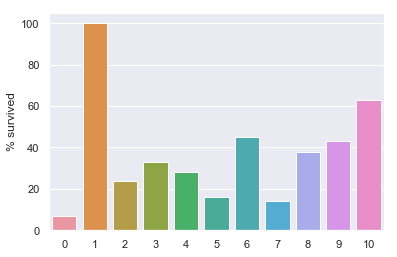

    Number people per Fair  % survived
0                       15         7.0
1                        3       100.0
2                       38        24.0
3                       81        33.0
4                      177        28.0
5                       61        16.0
6                       22        45.0
7                       70        14.0
8                      123        38.0
9                       77        43.0
10                     224        63.0


In [439]:
def manual_fare_bin(fare):
    if fare == 0: return 0 # based on kde
    elif fare < 4: return 1 # based on kde
    elif fare < 5: return 2 # based on kde
    elif fare < 7: return 3 # based on kde
    elif fare <= 7.796: return 4 # based on survival rate
    elif fare <= 7.896: return 5 # based on survival rate
    elif fare <= 7.925: return 6 # based on survival rate
    elif fare <=  8.662: return 7 # based on survival rate and KDE
    elif fare <= 12.5: return 8 # based on KDE
    elif fare <= 13.5: return 9 # based on survival rate and KDE
    else: return 10

both['Fare Bin manual'] = both['Fixed Fare'].apply(manual_fare_bin)
train_temp = both.iloc[:891]
train_temp['Survived'] = train['Survived']

print('Number of people per Fare per person (manual split) + survival rate in training set:')
fare_survived = pd.DataFrame({'Number people per Fair': train_temp['Fare Bin manual'].value_counts(), 
              '% survived': round(train_temp.groupby(by='Fare Bin manual')['Survived'].mean()*100)})

sns.barplot(x=fare_survived.index, y=fare_survived['% survived'])
plt.show()
print(fare_survived)

What's interesting is that by using KDE we found the 2 very interesting categories, fare = 0 with survival rate close to 0, and fare < 4.5 with survival rate of 100%

This is the initial split we'll go with in the beginning.  Another decision to make is whether to leave it one numeric category, or split into separate categories.  Initially split into separate categories, later we'll see if to leave as one
    
    if fare == 0: return 0 # based on kde
    elif fare < 4: return 1 # based on kde
    elif fare < 5: return 2 # based on kde
    elif fare < 7: return 3 # based on kde
    elif fare <= 7.796: return 4 # based on survival rate
    elif fare <= 7.896: return 5 # based on survival rate
    elif fare <= 7.925: return 6 # based on survival rate
    elif fare <=  8.662: return 7 # based on survival rate and KDE
    elif fare <= 12.5: return 8 # based on KDE
    elif fare <= 13.5: return 9 # based on survival rate and KDE
    else: return 10

# Age

We have a lot of missing values in age and need to decide how to fill them in. Let's look for categories that are related to age

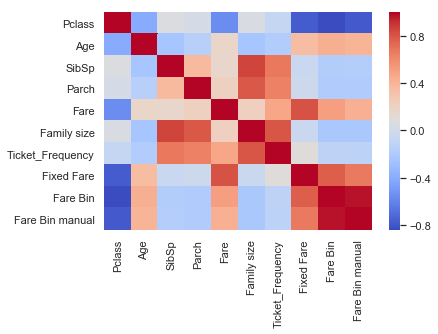

In [448]:
sns.heatmap(both.corr(), cmap='coolwarm')

We see that Age is closely correlated with Pclass, number of family members (SibSp, Parch, Family Size), Fare (presumabely due to PClass relationship). From separate investigation in the coce, it's also related to unknown deck (to be checked), and Title 

But first let's look what ages make a difference in survival

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


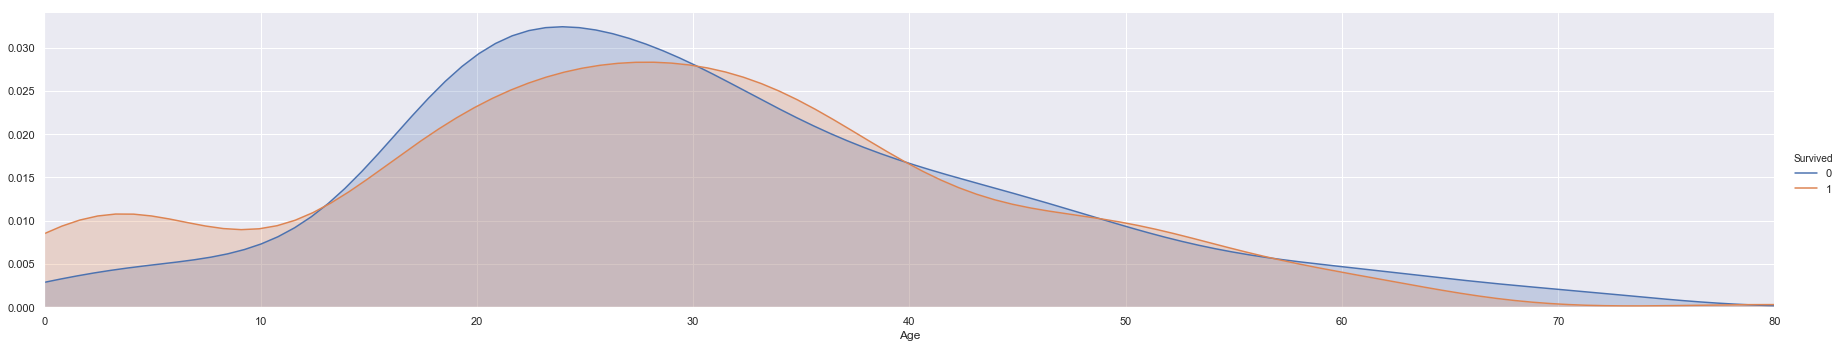

In [449]:
train_temp = both[:891]
train_temp['Survived'] = train['Survived']

facet = sns.FacetGrid(train_temp, hue="Survived",aspect=5, height=5)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_temp['Age'].max()))
facet.add_legend()

Based on KDE, would split the ages in the following way:
- < 12
- 12 to 30
- 30 to 40
- 40 to 48
- 48 to 57
- 57 and up

(714, 14)


C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Split into maximum bins of Number of people per Age + survival rate in training set:


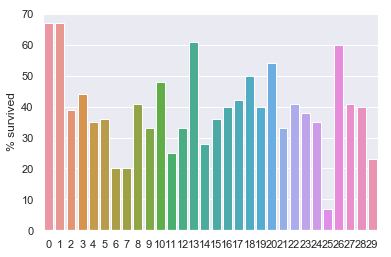

    Number people per Age  % survived          labels
0                      41        67.0    (0.169, 3.0]
1                      36        67.0      (3.0, 8.0]
2                      31        39.0     (8.0, 14.0]
3                      30        44.0    (14.0, 17.0]
4                      30        35.0    (17.0, 18.0]
5                      27        36.0    (18.0, 19.0]
6                      27        20.0    (19.0, 20.0]
7                      26        20.0    (20.0, 21.0]
8                      26        41.0    (21.0, 22.0]
9                      25        33.0    (22.0, 23.0]
10                     25        48.0    (23.0, 24.0]
11                     25        25.0    (24.0, 25.0]
12                     25        33.0    (25.0, 26.0]
13                     25        61.0    (26.0, 27.0]
14                     24        28.0    (27.0, 28.0]
15                     24        36.0    (28.0, 29.0]
16                     23        40.0    (29.0, 30.0]
17                     22   

In [469]:
age_known = both[both['Age'].isnull()==False]
labels = pd.qcut(age_known['Age'], q=30)

age_known['Age Bin'] = LabelEncoder().fit_transform(labels)
train_temp = age_known[:714]
train_temp['Survived'] = train[train['Age'].isnull()==False]['Survived']

print('Split into maximum bins of Number of people per Age + survival rate in training set:')
age_survived = pd.DataFrame({'Number people per Age': train_temp['Age Bin'].value_counts().reset_index(drop=True), 
              '% survived': round(train_temp.groupby(by='Age Bin')['Survived'].mean()*100)})

sns.barplot(x=age_survived.index, y=age_survived['% survived'])
plt.show()
age_survived['labels'] = labels.value_counts().sort_index().index

print(age_survived)

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Split into maximum bins of Number of people per Age + survival rate in training set - MALES ONLY:


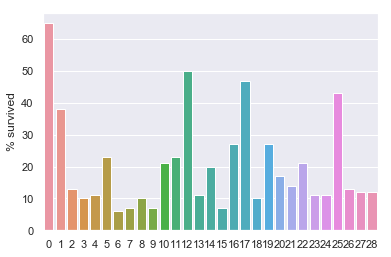

    Number people per Age  % survived        labels
0                      26        65.0  (0.329, 4.0]
1                      23        38.0   (4.0, 11.0]
2                      21        13.0  (11.0, 16.0]
3                      21        10.0  (16.0, 18.0]
4                      20        11.0  (18.0, 19.0]
5                      19        23.0  (19.0, 20.0]
6                      18         6.0  (20.0, 21.0]
7                      18         7.0  (21.0, 22.0]
8                      18        10.0  (22.0, 23.0]
9                      18         7.0  (23.0, 24.0]
10                     16        21.0  (24.0, 25.0]
11                     16        23.0  (25.0, 26.0]
12                     15        50.0  (26.0, 27.0]
13                     15        11.0  (27.0, 28.0]
14                     15        20.0  (28.0, 29.0]
15                     15         7.0  (29.0, 30.0]
16                     15        27.0  (30.0, 31.0]
17                     15        47.0  (31.0, 32.0]
18          

In [475]:
age_known = both[(both['Age'].isnull()==False) & (both['Sex']=='male')]
labels = pd.qcut(age_known['Age'], q=29)

age_known['Age Bin'] = LabelEncoder().fit_transform(labels)
train_temp = age_known[:train[(train['Age'].isnull()==False) & (both['Sex']=='male')].shape[0]]
train_temp['Survived'] = train[(train['Age'].isnull()==False) & (both['Sex']=='male')]['Survived']

print('Split into maximum bins of Number of people per Age + survival rate in training set - MALES ONLY:')
age_survived = pd.DataFrame({'Number people per Age': train_temp['Age Bin'].value_counts().reset_index(drop=True), 
              '% survived': round(train_temp.groupby(by='Age Bin')['Survived'].mean()*100)})

sns.barplot(x=age_survived.index, y=age_survived['% survived'])
plt.show()
age_survived['labels'] = labels.value_counts().sort_index().index

print(age_survived)

Based on this it's best to split men into following categories:
- <= 4 - 65%
- <= 11 - 38%
- <= 24 - 7%
- <= 26 - 22%
- <= 27 - 50%
- <= 31 - 15%
- <= 32 - 47%
- Above - 12%

C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\rkrichev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


Split into maximum bins of Number of people per Age + survival rate in training set - FEMALES ONLY:


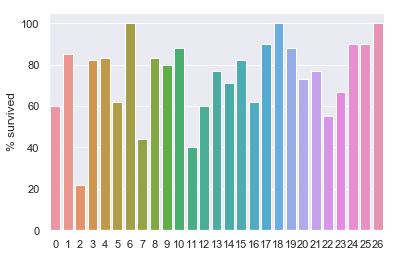

    Number people per Age  % survived          labels
0                      17        60.0    (0.169, 2.0]
1                      16        85.0      (2.0, 6.0]
2                      13        22.0     (6.0, 12.0]
3                      13        82.0    (12.0, 16.0]
4                      13        83.0  (16.0, 17.667]
5                      13        62.0  (17.667, 18.0]
6                      12       100.0    (18.0, 19.0]
7                      12        44.0    (19.0, 21.0]
8                      11        83.0    (21.0, 22.0]
9                      11        80.0    (22.0, 23.0]
10                     11        88.0    (23.0, 24.0]
11                     10        40.0    (24.0, 25.0]
12                     10        60.0  (25.0, 26.333]
13                     10        77.0  (26.333, 28.0]
14                     10        71.0    (28.0, 29.0]
15                      9        82.0    (29.0, 30.0]
16                      9        62.0    (30.0, 31.0]
17                      8   

In [488]:
age_known = both[(both['Age'].isnull()==False) & (both['Sex']=='female')]
labels = pd.qcut(age_known['Age'], q=27)

age_known['Age Bin'] = LabelEncoder().fit_transform(labels)
train_temp = age_known[:train[(train['Age'].isnull()==False) & (both['Sex']=='female')].shape[0]]
train_temp['Survived'] = train[(train['Age'].isnull()==False) & (both['Sex']=='female')]['Survived']

print('Split into maximum bins of Number of people per Age + survival rate in training set - FEMALES ONLY:')
age_survived = pd.DataFrame({'Number people per Age': train_temp['Age Bin'].value_counts().reset_index(drop=True), 
              '% survived': round(train_temp.groupby(by='Age Bin')['Survived'].mean()*100)})

sns.barplot(x=age_survived.index, y=age_survived['% survived'])
plt.show()
age_survived['labels'] = labels.value_counts().sort_index().index

print(age_survived)

In females, can't see a clear pattern.  A few exceptions:
- 6-12 very low percentage, but not enough instances to learn anything from it
- 18-19 - high percentage, but not enough instances to learn anything from it
Perhaps best to go according to the men

In [495]:
both[both['Deck']=='unknown']['Age'].describe()

count    774.000000
mean      27.406654
std       13.118409
min        0.170000
25%       20.000000
50%       26.000000
75%       34.000000
max       74.000000
Name: Age, dtype: float64

In [494]:
both['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

There is slightly lower average for people without known Deck (by 2.5 years on average), so if we'll do regression to predict age, it's better to take unknown deck into the account

In [499]:
for cl in [1,2,3]:
    print(f'\nClass {cl} ages:')
    print(both[both['Pclass']==cl]['Age'].describe())


Class 1 ages:
count    284.000000
mean      39.159930
std       14.548028
min        0.920000
25%       28.000000
50%       39.000000
75%       50.000000
max       80.000000
Name: Age, dtype: float64

Class 2 ages:
count    261.000000
mean      29.506705
std       13.638627
min        0.670000
25%       22.000000
50%       29.000000
75%       36.000000
max       70.000000
Name: Age, dtype: float64

Class 3 ages:
count    501.000000
mean      24.816367
std       11.958202
min        0.170000
25%       18.000000
50%       24.000000
75%       32.000000
max       74.000000
Name: Age, dtype: float64


We see the Pclass makes a big difference in the age

Let's see also Title

In [504]:
both.groupby('Mapped Title')['Age'].mean()

Mapped Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

We see there is a big difference in ages between ages

For now, decided that it's enough to take Title and Pclass into account when predicting age (as done in the code in titanic.py).  Might introduce Regressor prediction later

So taking age split up based on KDE and Survival rates:
Based on KDE, would split the ages in the following way:
- < 12
- 12 to 30
- 30 to 40
- 40 to 48
- 48 to 57
- 57 and up

Based on survival rates:
- <= 4 - 65%
- <= 11 - 38%
- <= 24 - 7%
- <= 26 - 22%
- <= 27 - 50%
- <= 31 - 15%
- <= 32 - 47%
- Above - 12%

**Together**:
- <= 4 - 65%
- <= 11 - 38%
- <= 24 - 7%
- <= 26 - 22%
- <= 27 - 50%
- <= 31 - 15%
- <= 32 - 47%
- <= 40 - KDE based
- <= 48 - KDE based
- <= 57 - KDE based
- Above - 12%

Number of people per Age (manual split) + survival rate in training set:


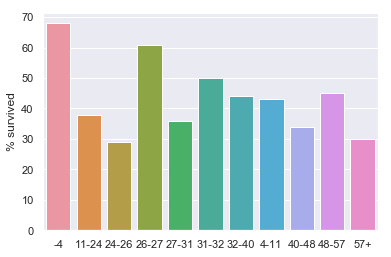

       Number people per age  % survived
-4                        40        68.0
11-24                    209        38.0
24-26                     42        29.0
26-27                     18        61.0
27-31                     91        36.0
31-32                     18        50.0
32-40                    118        44.0
4-11                      28        43.0
40-48                     70        34.0
48-57                     47        45.0
57+                      210        30.0


In [511]:
def manual_age_bin(age):
    if age <= 4: return '-4' # based on survival rate
    elif age <= 11: return '4-11' # based on survival rate
    elif age <= 24: return '11-24' # based on survival rate
    elif age <= 26: return '24-26' # based on survival rate
    elif age <= 27: return '26-27' # based on survival rate
    elif age <= 31: return '27-31' # based on survival rate
    elif age <= 32: return '31-32' # based on survival rate 
    elif age <= 40: return '32-40' # based on KDE
    elif age <= 48: return '40-48' # based on KDE
    elif age <= 57: return '48-57' # based on KDE
    else: return '57+'


train_temp = train.copy()
train_temp['Age bin'] = train_temp['Age'].apply(manual_age_bin)

print('Number of people per Age (manual split) + survival rate in training set:')
age_survived = pd.DataFrame({'Number people per age': train_temp['Age bin'].value_counts(), 
              '% survived': round(train_temp.groupby(by='Age bin')['Survived'].mean()*100)})

sns.barplot(x=age_survived.index, y=age_survived['% survived'])
plt.show()
print(age_survived)

# What's interesting about men that survived

Most men didn't survive, most women survived, vast majority of kids survived.  Look into men that survived.

In [576]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Title', 'Family size', 'Deck'],
      dtype='object')

In [580]:
def print_percent_survived_title(train, col, title):
    df = pd.DataFrame({title: train[train['Mapped Title']==title][col].value_counts().sort_index()})
    df['Survived'] = train[(train['Mapped Title']==title) & (train['Survived']==1)][col].value_counts().sort_index() 
    df['% survived'] = round(df['Survived'] / df[title] * 100)
    df['Survived'].fillna(0, inplace=True)
    df['% survived'].fillna(0, inplace=True)
    print(f'{col}:\n{df}')

**NOT LOOKING INTO:**
- 'Pclass' - not a lot of categories, already know the connection
- 'Age' - already looked into connection
- 'Title' - already know the connection
- Fare - too complicated to look into connection, don't believe made more of a difference than class and Deck
- Embarked - don't believe special difference for males

In [583]:
print_percent_survived_title(train, 'SibSp', 'Mr')

SibSp:
    Mr  Survived  % survived
0  429      68.0        16.0
1   88      17.0        19.0
2   14       2.0        14.0
3    1       0.0         0.0
4    2       0.0         0.0
5    1       0.0         0.0
8    3       0.0         0.0


**Nothing to change:** 'SibSp' - 0 lower, 1 - higher, 2 - lower, 3 and up - not enough info, but those are already separate SibSp categories

In [584]:
print_percent_survived_title(train, 'Parch', 'Mr')

Parch:
    Mr  Survived  % survived
0  484      80.0        17.0
1   35       5.0        14.0
2   15       2.0        13.0
3    1       0.0         0.0
4    2       0.0         0.0
5    1       0.0         0.0


**Nothing to change:** `Parch` - 0,1,2 - similar survival, 3 and up - not enough info, but those are already separate `Parch` categories

In [586]:
print_percent_survived_title(train, 'Family size', 'Mr')

Family size:
     Mr  Survived  % survived
1   412      65.0        16.0
2    71      15.0        21.0
3    38       6.0        16.0
4     6       1.0        17.0
5     1       0.0         0.0
6     5       0.0         0.0
7     1       0.0         0.0
8     1       0.0         0.0
11    3       0.0         0.0


**Making a change**: `Family size` - 1-4 similar, with 2 being slightly higher, but not drastically that's worth splitting 2 & 3 that are together now.  5 and up - not enough info

In [587]:
print_percent_survived_title(train, 'Deck','Mr')

Deck:
          Mr  Survived  % survived
A         13       5.0        38.0
B         19       7.0        37.0
C         31      10.0        32.0
D         16       8.0        50.0
E         16       9.0        56.0
F          5       0.0         0.0
T          1       0.0         0.0
unknown  437      48.0        11.0


**Making a change:**
`Deck` - AB together, C - lower, D - higher, E - highest, F,T - not enough info, but seems lower, unknown - very low
- Currently, F is with C, which is OK since we don't have enough info about F.  
- Currently BDE are together, while perhaps it's better to split B out, since lower survival rate than DE

# What's interesting about women that didn't survive

In [588]:
print_percent_survived_title(train, 'SibSp', 'Mrs')

SibSp:
   Mrs  Survived  % survived
0   47        39        83.0
1   76        58        76.0
2    3         3       100.0
3    2         2       100.0


**No change:** `SibSp` - need to split 0 & 1. 2 & 3 - not enough info. Already split today

In [589]:
print_percent_survived_title(train, 'Parch', 'Mrs')

Parch:
   Mrs  Survived  % survived
0   72      62.0        86.0
1   32      26.0        81.0
2   13      10.0        77.0
3    4       3.0        75.0
4    2       0.0         0.0
5    4       1.0        25.0
6    1       0.0         0.0


**No change:** `Parch` - 3 and up - not enough info, 0, 1, 2 - percentages differ slightly, not critical to split. Leaving as today, 0 separate, 1,2,3 together

In [591]:
print_percent_survived_title(train, 'Family size', 'Mrs')

Family size:
   Mrs  Survived  % survived
1   22      20.0        91.0
2   60      51.0        85.0
3   27      20.0        74.0
4    9       8.0        89.0
5    3       1.0        33.0
6    4       1.0        25.0
7    2       1.0        50.0
8    1       0.0         0.0


**Making change**: `Family size` - above 5 not enough info, 1-4 similar enough, 3 being slighly lower.  Splitting 3 out.

In [592]:
print_percent_survived_title(train, 'Deck', 'Mrs')

Deck:
         Mrs  Survived  % survived
A          1         1       100.0
B         12        12       100.0
C         14        13        93.0
D          9         9       100.0
E          7         6        86.0
F          2         2       100.0
G          2         1        50.0
unknown   81        58        72.0


**No change:** Differences not significant for most, F, G - not enough info, the only one that's significanly different is `unknown`, and it's already separate

In [574]:
train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Lady              1
Jonkheer          1
Don               1
the Countess      1
Ms                1
Mme               1
Sir               1
Capt              1
Name: Title, dtype: int64

# What's interesting about Miss that didn't survive

In [595]:
print_percent_survived_title(train, 'SibSp', 'Miss')
print_percent_survived_title(train, 'Parch', 'Miss')
print_percent_survived_title(train, 'Family size', 'Miss')
print_percent_survived_title(train, 'Deck', 'Miss')

SibSp:
   Miss  Survived  % survived
0   126      97.0        77.0
1    30      22.0        73.0
2    10       7.0        70.0
3     9       2.0        22.0
4     6       2.0        33.0
5     1       0.0         0.0
8     3       0.0         0.0
Parch:
   Miss  Survived  % survived
0   121        90        74.0
1    28        20        71.0
2    36        20        56.0
Family size:
    Miss  Survived  % survived
1    103      78.0        76.0
2     27      20.0        74.0
3     22      18.0        82.0
4     10       8.0        80.0
5      9       2.0        22.0
6      4       2.0        50.0
7      6       2.0        33.0
8      1       0.0         0.0
11     3       0.0         0.0
Deck:
         Miss  Survived  % survived
B          15        15       100.0
C          13        11        85.0
D           8         8       100.0
E           8         8       100.0
F           3         3       100.0
G           2         1        50.0
unknown   136        84        62.0


- `SibSp` - 0-2 same probability, 3-4 lower, more - lower, but not enough info. **No change**
- `Parch` - 2 only significantly different, already separate. **Change**: splitting 2 out
- `Family size` - 1-4 similar, 5 and up - lower, not enough info **No change**
- `Deck`, G - not enough info, rest - similar, besides unknown that's already separate.  **No change**

## What's interesting about Master that didn't survive

In [596]:
print_percent_survived_title(train, 'SibSp', 'Master')
print_percent_survived_title(train, 'Parch', 'Master')
print_percent_survived_title(train, 'Family size', 'Master')
print_percent_survived_title(train, 'Deck', 'Master')

SibSp:
   Master  Survived  % survived
0       6       6.0       100.0
1      15      15.0       100.0
2       1       1.0       100.0
3       4       0.0         0.0
4      10       1.0        10.0
5       3       0.0         0.0
8       1       0.0         0.0
Parch:
   Master  Survived  % survived
0       1         1       100.0
1      23        14        61.0
2      16         8        50.0
Family size:
    Master  Survived  % survived
2        3       3.0       100.0
3       15      15.0       100.0
4        4       4.0       100.0
5        2       0.0         0.0
6        9       0.0         0.0
7        3       1.0        33.0
8        3       0.0         0.0
11       1       0.0         0.0
Deck:
         Master  Survived  % survived
A             1         1       100.0
B             1         1       100.0
C             1         1       100.0
E             1         1       100.0
F             3         3       100.0
unknown      33        16        48.0


- `SibSp` - 0-2 same probability, 3 - 0, but not enough info, 4 low, 5 and up more - lower, but not enough info. **No change**
- `Parch` - 0, 1, 2 different, but already split. **No change**
- `Family size` - 2-4 similar, 5 and up - lower, not enough info **No change**
- `Deck`-  unknown different, already separate, that's already separate.  **No change**